# Primer Analisis al ídice bursatil S&P 500

## Parcial I
## ESE-IPN
## Series de Tiempo

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
 # Otras opciones son "dark", "darkgrid", "whitegrid".

## 1. Información general sobre la serie tiempo elegida. Características de frecuencia, unidad de medida y fuente (añadir URL y ruta temática).
#### **Información General**

La serie de tiempo escogida para este trabajo es el indicador bursátil llamado S&P 500 (Standard & Poor´s 500). Este índice es uno de los índices mas importantes de la economía estadounidense, ya que este representa la capitalización de las 500 empresas más grandes en cotización en la bolsa de valores (NYSE o NASDAQ).

La justificación de la elección de esta variable, esta en la forma que es ponderada, (a través del capital flotante) la cual la hacen de los índices mas representativo de la situación del mercado accionario, principalmente estadounidense. Este indicador existe en otras bolsas fuera de los Estados Unidos, pero este trabajo trabaja con el índice Estadounidense, ya que esta abarca las 500 empresas mas fuertes de este país, que en su mayor parte son las más fuertes del mundo.
Frecuencia.

#### **Frecuencia**
La periodicidad con la que se le da mantenimiento al indicador es constante, por las características que debe tener para que este se mantenga como un indicador dentro de la bolsa, es por eso por lo que este varia cada segundo (ya sea la capitalización de las 500 empresas) durante esta abierta la bolsa NYSE o NASDAQ. Los valores que se toman son los de cierre, osease el valor con el que termina el día pero para no tener una base tan grande, se utilizo el valor de cierre del último día de cada mes, desde el año de 2000 al 2021. Brindándole así 265 observaciones.
Fuente.

#### **Fuente**
Al ser un valor en bolsa, este se saca de paginas especializadas en este rubro, como lo es yahoo finance:https://esus.finanzas.yahoo.com/quote/%5EGSPC?p=%5EGSPC&.tsrc=fin-srch

In [ ]:
# LLamamos a la base como: SyP, dentro de Phyton
SyP = pd.read_csv("C:/Users/ismay/OneDrive/Escritorio/Series/Bases/Serie_S&P500.csv", parse_dates=["Fecha"], index_col="Fecha")
# Presentar las primeras cinco líneas
SyP.head()

,Cierre
Fecha,
2000-01-31,1394.46
2000-02-28,1366.42
2000-03-29,1508.52
2000-04-30,1468.25
2000-05-31,1420.60


## 2. Realizar el análisis del gráfico que contiene información original de la serie así como de observaciones atípicas. Presentar un gráfico con señalamiento sombreado identificando cambios relevantes de tendencia.

#### **Información general**
En la ****Gráfica 1**** podemos ver la tendencia de la serie de tiempos, la cual es ascendente en lo general, pero al analizarla particularmente, encontramos algunos picos descendentes, como lo son antes del 2004, en 2009 y 2020, estos dos últimas resultan obvias, ya que como sabemos que este es un índice bursátil, los cuales son muy receptivos a los acontecimientos mundiales, ya sean directos o indirectos, por ejemplo en 2008, se dio una gran crisis financiera, la cual obviamente afecto a la capitalización de las acciones y por ende un disminución del indicador. En el caso de 2020 se dio por la reciente pandemia del COVID-19 y como mencionamos que los mercados financieros son muy receptivos, la especulación hizo disminuir a los activos de manera más repentina que lo visto en la crisis de 2008.

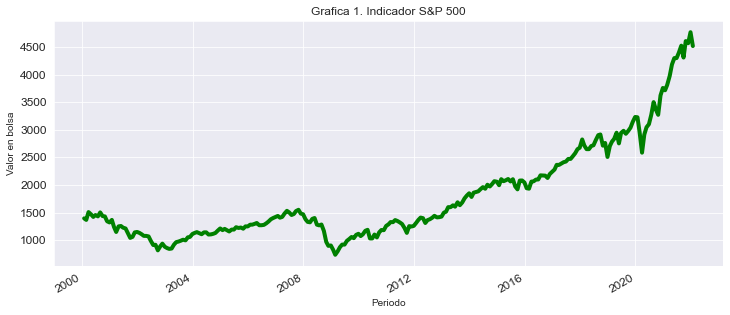

In [ ]:
SyP.Cierre.plot()
ax = SyP.Cierre.plot(figsize=(12, 5), fontsize=12, linewidth=4, color="g")
ax.set_xlabel("Periodo")
ax.set_ylabel("Valor en bolsa")
ax.set_title("Grafica 1. Indicador S&P 500")
# Ver el gráfico
plt.show()

Podemos ver de mejor manera la tendencia de la serie de datos en la ****Gráfica 2****, de las 4 graficas que se pueden ver en este apartado, tenemos al principio la misma gráfica de arriba, pero en la segunda podemos ver en comportamiento de la tendencia, la cual como dijimos es ascendente, pero con algunos periodos descendentes, en la tercera parte tenemos la gráfica que demuestra la estacionalidad de la serie de datos, la cual de manera ilustrativa, podemos ver que la serie es estacional, osease esta tercer grafica demuestra que en la serie tiene un comportamiento repetitivo en ciertos periodos de tiempo, lo que se conoce como estacionalidad. Por último tenemos el comportamiento residual de la variable, en donde podemos ver que el comportamiento de estos tienden a la media durante prácticamente toda la serie, pero es justamente al final, cuando los residuos se comportan de manera más dispersa.

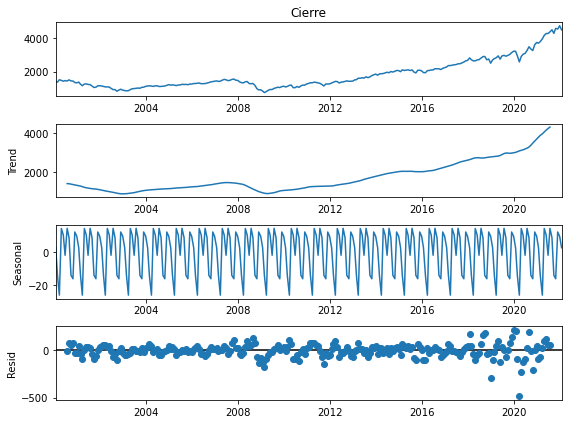

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
decomposition = sm.tsa.seasonal_decompose(SyP['Cierre'], period=12)
fig = decomposition.plot()
ax.set_title("Grafica 2. Indicador S&P 500")
plt.show()

La ****Gráfica 2.1**** reafirma la tendencia, pero además a través de esta gráfica podemos determinar que la tendencia de la serie es estocástica, por el simple hecho de que hay momentos en la serie donde esta decrece de manera repentina, lo cual genera incertidumbre a la hora de pronosticar.

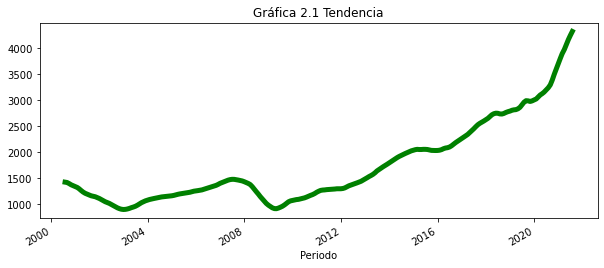

In [ ]:
decomp_seasonal = decomposition.trend
ax = decomp_seasonal.plot(figsize=(10, 4), linewidth=5, color="green")
ax.set_xlabel('Periodo')
ax.set_title('Gráfica 2.1 Tendencia')
plt.show()

La ****La gráfica 2.2**** demuestra la estacionariedad de la serie, de manera individual.

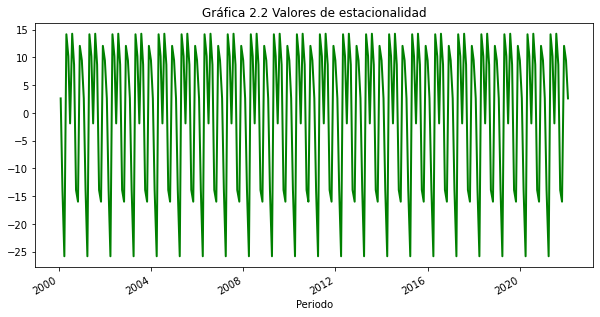

In [ ]:
decomp_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(10, 5), linewidth=2, color="green")
ax.set_xlabel('Periodo')
ax.set_title('Gráfica 2.2 Valores de estacionalidad')
plt.show()

#### Cambios relevantes en la tendencia
Para finalizar este punto tenemos la gráfica ****Gráfica 3 y 4**** En la primera de estas dos podemos ver el valor más bajo de la tendencia el cual se da en *27/02/2009* y arroja un valor de *735.0900269*, el cual ya dijimos que es el más bajo en el periodo de análisis. Este valor fue más bajo ocasionado por la crisis de 2008, pero después de esta la bolsa de valores tomo mucha fuerza, ya que a partir de aquí la tendencia de la serie es claramente ascendente.
Esta tendencia claramente ascendente se sombrea en la ****gráfica 4****. Hay que recordar que el indicador S&P 500 da una gran aproximación de la situación real del mercado de valores, es por ello que la ****gráfica 4**** nos demuestra que desde principios de 2009, el mercado bursátil ha crecido de manera gigantesca en cuanto a capitalización, lo cual hace creer (a través del marco teórico de los ciclos de la economía) que en algún momento probablemente cercano esta tenga otra caída significante, la pregunta seria ¿Esta caída sería de las mismas proporciones a las que está creciendo? Diferentes teóricos consideran que para que esto pase no falta mucho.

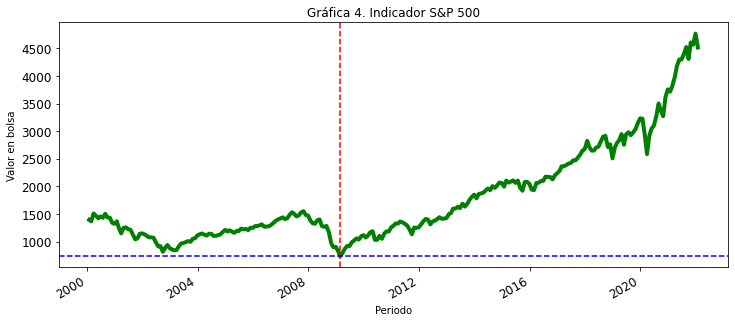

In [ ]:
ax = SyP.Cierre.plot(figsize=(12, 5), fontsize=12, linewidth=4, color="green")

# Fijar los ejes x-y y título
ax.set_xlabel('Periodo')
ax.set_ylabel('Valor en bolsa')
ax.set_title('Gráfica 4. Indicador S&P 500')

# Agregar una línea vertical y horizontal
ax.axvline('27/02/2009', color='red', linestyle='--')
ax.axhline(735.090027, color='b', linestyle='--')

# Ver el gráfico
plt.show()

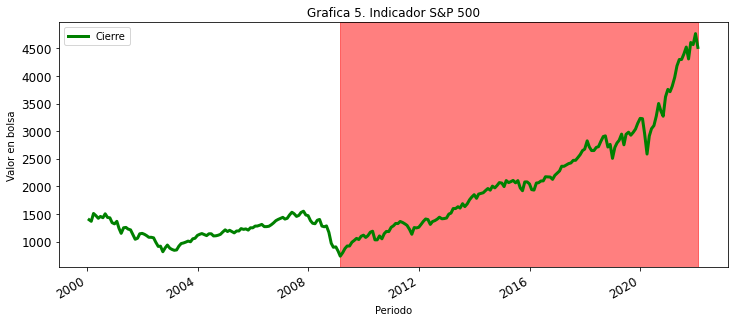

In [ ]:
data_subset = SyP['2000':'2022']
ax = data_subset.plot(figsize=(12, 5), fontsize=12, linewidth=3, color="green")

# Fijar los ejes x-y y título
ax.set_xlabel('Periodo')
ax.set_ylabel('Valor en bolsa')
ax.set_title('Grafica 5. Indicador S&P 500')

# Agregar una región verde
ax.axvspan('27/02/2009', '31/01/2022', color='r', alpha=0.5)

# Ver el gráfico
plt.show()

## 3. Realizar el análisis de las estadísticas relevantes *(comando.describe())*, sustentar análisis con gráficos de cajas, histograma y diagrama de Kernel.

#### Resumen de la serie
Media = *1785.666565* --> Este valor representa el valor promedio que ha indicado el índice en los últimos 22 años.
Desviación Estándar = *877.726425* --> La dispersión de los datos con respecto al promedio, el cual es bajo, sabiendo que es poco más que el valor mínimo, lo que quiere decir que al moverse *877.726425* a partir del promedio tanto a la izquierda como a la derecha, se verán representados la mayoría de los valores.
Mediana = *1412.160034* --> Que no es más que el valor de posición central.
Mínimo = *735.090027* --> Valor más pequeño en la serie,
Máximo = *4766.180176* --> El valor más alto de la serie.

In [ ]:
SyP.describe()

,Cierre
count,265.000000
mean,1785.666565
std,877.726425
min,735.090027
25%,1173.819946
50%,1412.160034
75%,2126.149902
max,4766.180176


Lo anterior lo podemos ver de manera ilustrativa en la Gráfica 6 a través de una gráfica de caja y bigotes. Este si la analizamos de abajo hacia arriba, tendríamos:
* Valor Mínimo
* Q1
* Q2 ó Mediana
* Q3
* Valor Máximo

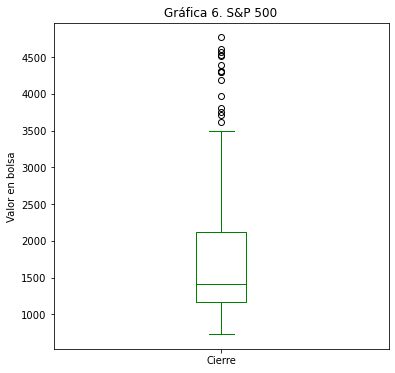

In [ ]:
ax = SyP.plot(figsize=(6, 6), kind='box', color="green")
ax.set_xlabel('')
ax.set_ylabel('Valor en bolsa')
ax.set_title('Gráfica 6. S&P 500')
plt.show()

En la ****Grafica 6.1**** tenemos 12 graficas de caja y bigotes, uno por cada mes del año, esto nos ayuda a determinar que mes del año el indicador tiene una valorización mayor para la capitalización de las 500 mayores empresas en la bolsa de valores:
* Primero vemos que la mediana es muy similar en cada uno de los meses, aunque se ve una ascendencia de la media, cada vez que se acerca a diciembre, pero son valores muy similares.
* Octubre es el mes con el valor máximo de toda la serie y además también cuenta con el valor menos mínimo de todos los meses, esto sucede por lo que se conoce como Rally de Navidad porque todas las empresas están en busca del cierre anual y por ello el valor de las acciones de estas empresas sube.
* En cambio el valor más bajo entre los máximos, le corresponde a marzo.
* Analizando los máximos de cada uno de los meses, vemos que a mediados del año esta tiende a subir y empiezan a bajar los primeros meses del año.
* Con lo anterior podemos deducir que se puede comprar acciones de alguna de estas 500 empresas a principio de año, las cuales muy probablemente suban al cierre de este, claro está que al hacer este tipo de acciones existe un cierto riesgo que hay que estar dispuesto a tomar y más tomando en cuenta lo especulativa que es la bolsa de valores.

C:\Users\ismay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


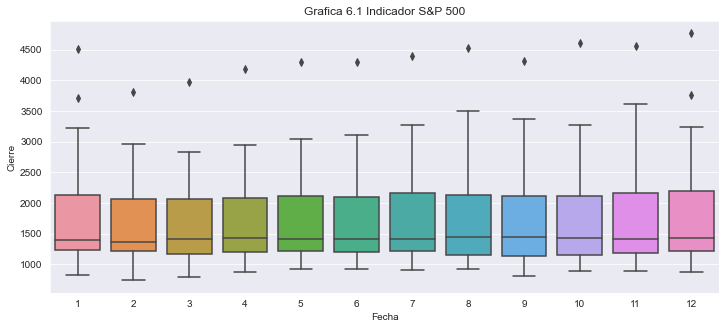

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(SyP.index.month, SyP.Cierre, ax=ax)
ax.set_title("Grafica 6.1 Indicador S&P 500")
plt.show()

Con el histograma de la ****Gráfica 7.**** vemos como se distribuyen los datos. Aquí tambien podemos ver al rededor del valor 1500 se agrupan la mayoria de las observaciones, lo cual ya vimos con el promedio y la mediana en el resumen.

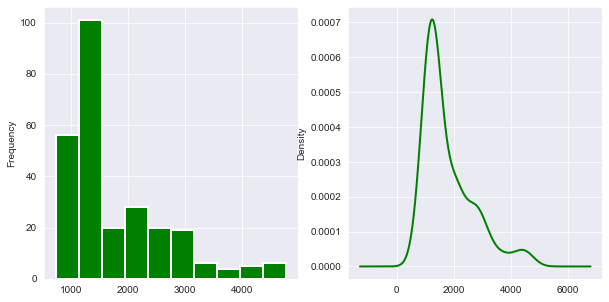

In [ ]:
plt.subplot(1, 2, 1)
SyP.Cierre.plot(kind='hist', figsize=(10, 5), linewidth=2, color="g")
plt.subplot(1, 2, 2)
SyP.Cierre.plot(kind='density', figsize=(10, 5), linewidth=2, color= "g")
ax.set_title("Grafica 7. Indicador S&P 500")
plt.show()

## 4. Describir los patrones que mejor representen a la serie de tiempo. Sustentar análisis con el gráfico de descomposición clásica y comparar con el de descomposición STL.

**Descomposición Clásica**


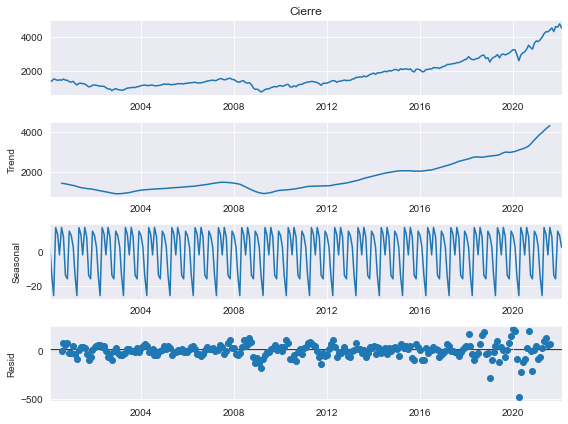

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
decomposition = sm.tsa.seasonal_decompose(SyP['Cierre'], period=12)
fig = decomposition.plot()
ax.set_title("Grafica 2. Indicador S&P 500")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
SyPSTL = SyP.resample('M').mean().ffill()

**Descomposición STL**

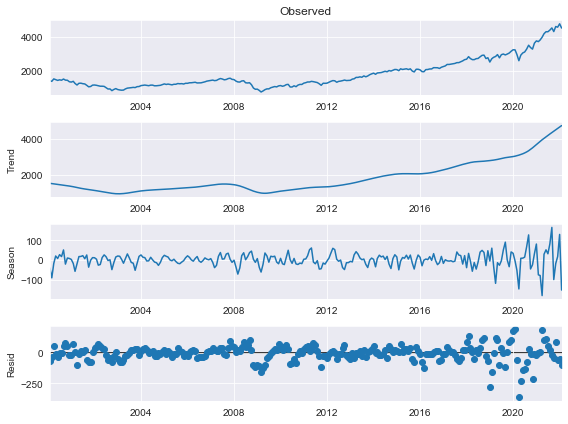

In [ ]:
res = STL(SyPSTL).fit()"
res.plot()
ax.set_title("Grafica 8. Indicador S&P 500")
plt.show()

Entre ambas descomposiciones, las dos últimas son las que tienen diferencias entre si, en cuanto a la estacionariedad, vemos que esta es la misma para toda la serie, en cambio en la descomposición STL, podemos ver que la estacionariedad es igual pero solo en algunos periodos, es decir, la estacionalidad está marcada por periodos.

## 5. Presentar en un mismo gráfico un MA (3), MA (5), MA (7), MA (9). Mencionar características de los hallazgos.

**Se crea media movil de orden 3**

In [ ]:
SyP['MM_3'] = SyP.Cierre.rolling(window=4).mean(center=True)

SyP.head(10)

,Cierre,MM_3
Fecha,,
2000-01-31,1394.46,NaN
2000-02-28,1366.42,NaN
2000-03-29,1508.52,NaN
2000-04-30,1468.25,1434.4125
2000-05-31,1420.60,1440.9475
2000-06-28,1454.82,1463.0475
2000-07-31,1430.83,1443.6250
2000-08-30,1502.59,1452.2100
2000-09-30,1436.51,1456.1875


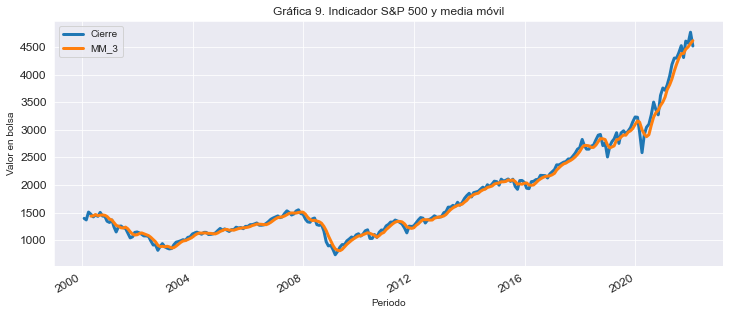

In [ ]:
SyP.plot(figsize=(12, 5), fontsize=12, linewidth=3)

plt.xlabel('Periodo')
plt.ylabel('Valor en bolsa')
plt.title('Gráfica 9. Indicador S&P 500 y media móvil')
plt.show()

**Se crea medias moviles de orden 5, 7 y 9**

In [ ]:
SyP['MM_5'] = SyP.Cierre.rolling(window=6).mean(center=True)
SyP['MM_7'] = SyP.Cierre.rolling(window=12).mean(center=True)
SyP['MM_9'] = SyP.Cierre.rolling(window=24).mean(center=True)

SyP.head(10)

,Cierre,MM_3,MM_5,MM_7,MM_9
Fecha,,,,,
2000-01-31,1394.46,NaN,NaN,NaN,NaN
2000-02-28,1366.42,NaN,NaN,NaN,NaN
2000-03-29,1508.52,NaN,NaN,NaN,NaN
2000-04-30,1468.25,1434.4125,NaN,NaN,NaN
2000-05-31,1420.60,1440.9475,NaN,NaN,NaN
2000-06-28,1454.82,1463.0475,1435.511667,NaN,NaN
2000-07-31,1430.83,1443.6250,1441.573333,NaN,NaN
2000-08-30,1502.59,1452.2100,1464.268333,NaN,NaN
2000-09-30,1436.51,1456.1875,1452.266667,NaN,NaN


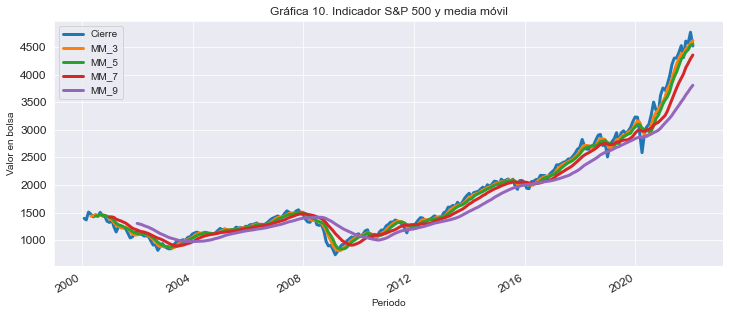

In [ ]:
SyP.plot(figsize=(12, 5), fontsize=12, linewidth=3)

plt.xlabel('Periodo')
plt.ylabel('Valor en bolsa')
plt.title('Gráfica 10. Indicador S&P 500 y media móvil')
plt.show()

Con las medias móviles, que vemos en las ****Gráficas 9 y 10****, vemos como mediante promedios, suavizamos la serie cada vez más, según crezca el oren del promedio móvil.
El problema de las medias móviles es que hay datos que se pierden, es por eso que la media móvil de orden 9, se considera muy excesiva en la perdida de datos. Estos datos los podemos ver de manera grafica al ver que cada media inicia después de la serie original y a la hora de crear los valores de las medias móviles en el tabulado se ven las celdas con falta de datos.
* **MM_3** pierde 3 observaciones
* **MM_5** pierde 6 observaciones
* **MM_7** pierde 12 observaciones
* **MM_9** pierde 24 observaciones

## 6. Estimar un modelo clásico de regresión lineal utilizando la serie elegida como variable dependiente y el tiempo como independiente. Presentar el modelo y su gráfico para facilitar el análisis.

**Creamos la variable tiempo**

In [ ]:
SyP['Time'] = np.arange(len(SyP.index)) #hacer variable "Tiempo"

SyP.head()

,Cierre,Time
Fecha,,
2000-01-31,1394.46,0
2000-02-28,1366.42,1
2000-03-29,1508.52,2
2000-04-30,1468.25,3
2000-05-31,1420.60,4


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

Creamos el modelo --> **mod1**

In [ ]:
X = SyP["Time"]
X = sm.add_constant(X)
y = SyP["Cierre"]

mod1 = sm.OLS(y, X).fit()
reg1= mod1.predict(X)
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Cierre   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     584.8
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           8.44e-69
Time:                        15:49:34   Log-Likelihood:                -2016.4
No. Observations:                 265   AIC:                             4037.
Df Residuals:                     263   BIC:                             4044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        530.1713     60.006      8.835      0.0

La regresión lineal describe al modelo como: **$Valor en cierre = 530.1713 + 9.5113T$**

La constante del modelo es igual *530.1713* lo que quiere decir que aunque la variable explicativa (en este caso el tiempo) sea 0 o se encuentre en el periodo 0 el valor del índice sería igual a *530.1713*. Cuando la variable tiempo avanza una unidad (ósese un mes) aumenta el *Valor en Cierre* en *9.5113*

La $R^2$, que nos sirve para saber en qué porcentaje el modelo explica a todas las variables del modelo, un valor un tanto significativo, talvez no muy alto como gustaría, pero aun así un *69%* es un valor significativo, para realizar pronósticos acertados y relevantes.

Creamos el modelo --> **mod11**

In [ ]:
mod11 = smf.ols('Cierre ~ Time', data=SyP).fit()

mod11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Cierre   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     584.8
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           8.44e-69
Time:                        15:49:43   Log-Likelihood:                -2016.4
No. Observations:                 265   AIC:                             4037.
Df Residuals:                     263   BIC:                             4044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    530.1713     60.006      8.835      0.000     412.017     648.325
Time           9.5113      0.393     24.182      0.000       8.737      10.286
==============================================================================
Omnibus:                       44.082   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.656
Skew:                           1.012   Prob(JB):                     9.12e-15
Kurtosis:                       4.327   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Esta segunda regresión **(mod11)** tenemos exactamente lo mismo que en la primer regresión realizada, solamente cambia el formato del "summary" y el código para realizarlo.

Con la ****Gráfica 11**** vemos de manera ilustrativa, el ajuste que tiene la regresión *($R^2$)* con respecto a la serie. En esta gráfica podemos ver que tiene una gran cantidad que valores dentro de la regresión lineal, pero aún existen ciertos datos que no se encuentran ajustados a esta regresión, para ello se utilizan los convertir a logaritmos a los valores.

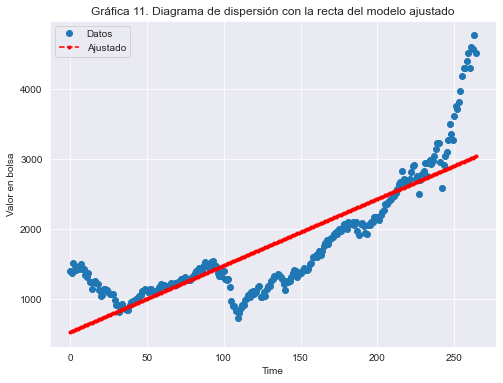

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(SyP["Time"] , SyP["Cierre"] , 'o', label="Datos")
ax.plot(SyP["Time"], mod11.fittedvalues, 'r--.', label="Ajustado")
legend = ax.legend(loc="best")
plt.xlabel('Time')
plt.ylabel('Valor en bolsa')
plt.title('Gráfica 11. Diagrama de dispersión con la recta del modelo ajustado');

## 7. Obtener estacionariedad mediante los comandos np.log()np.sqrt() df.shift(1)/df,

**np.log()**

In [ ]:
logSyP=np.log(SyP)
print(logSyP)

              Cierre
Fecha               
2000-01-31  7.240263
2000-02-28  7.219949
2000-03-29  7.318884
2000-04-30  7.291826
2000-05-31  7.258835
...              ...
2021-09-30  8.368122
2021-10-29  8.434980
2021-11-30  8.426612
2021-12-31  8.469300
2022-01-31  8.415282

[265 rows x 1 columns]


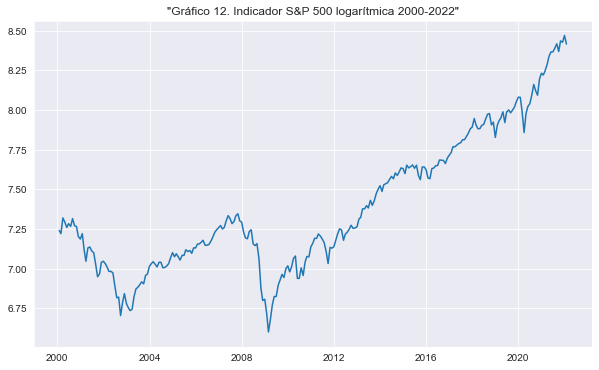

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.log(SyP['Cierre']))
ax.set_title('"Gráfico 12. Indicador S&P 500 logarítmica 2000-2022"')
plt.show()

**np.sqrt()**

In [ ]:
tcc=np.sqrt(SyP)
print(tcc)

               Cierre
Fecha                
2000-01-31  37.342469
2000-02-28  36.965119
2000-03-29  38.839670
2000-04-30  38.317750
2000-05-31  37.690848
...               ...
2021-09-30  65.631852
2021-10-29  67.862949
2021-11-30  67.579583
2021-12-31  69.037527
2022-01-31  67.197841

[265 rows x 1 columns]


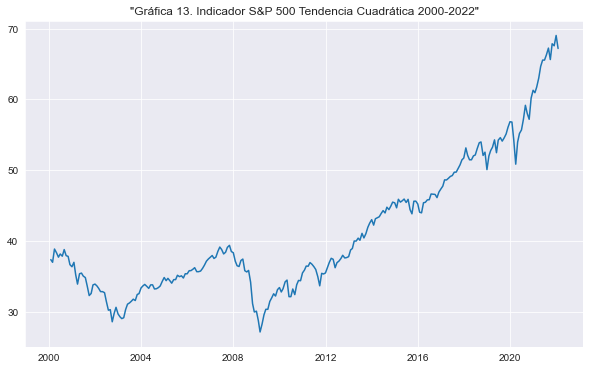

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.sqrt(SyP['Cierre']))
ax.set_title('"Gráfica 13. Indicador S&P 500 Tendencia Cuadrática 2000-2022"')
plt.show()

No se observan cambios en la tendencias significativas en las **Gráficas 12 y 13** que representan la tendencia logaritmica y la tendencia cuadratica, lo cual nos sirveria para una futura regresión lineal si el $R^2$ es ma

**df.shift(1)/df**

In [ ]:
tascre=SyP.shift(1)/SyP
tascre

,Cierre
Fecha,
2000-01-31,NaN
2000-02-28,1.020521
2000-03-29,0.905802
2000-04-30,1.027427
2000-05-31,1.033542
...,...
2021-09-30,1.049945
2021-10-29,0.935328
2021-11-30,1.008404


A diferencia de las ultimas dos graficas, en la **Gráfica 14** vemos que la frecuencia de la serie cambia por completo.

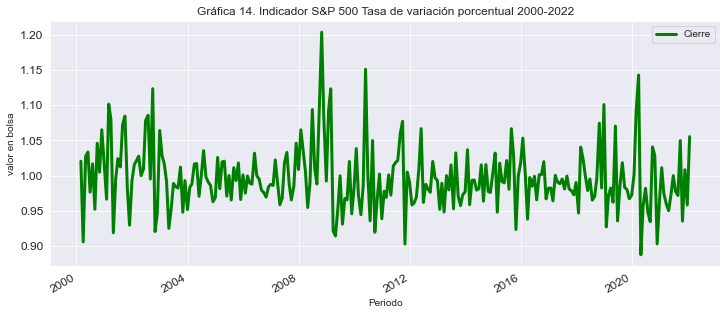

In [ ]:
ax = tascre.plot(figsize=(12, 5), fontsize=12, linewidth=3, color="green")
ax.set_xlabel("Periodo")
ax.set_ylabel("valor en bolsa")
ax.set_title("Gráfica 14. Indicador S&P 500 Tasa de variación porcentual 2000-2022")
plt.show()

## 8. Estimar un modelo clásico de regresión lineal utilizando la serie elegida como variable dependiente y el tiempo como independiente.  De ser necesario aplicar transformaciones logarítmicas, tendencias cuadráticas y comparar con la estimación anterior. Evaluar hallazgos mediante test de normalidad.

**Regresión con logarítmos**

In [ ]:
mod2 = smf.ols("np.log(Cierre) ~ t", data = SyP).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Cierre)   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     723.8
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.74e-77
Time:                        16:42:43   Log-Likelihood:                 23.420
No. Observations:                 265   AIC:                            -42.84
Df Residuals:                     263   BIC:                            -35.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7492      0.027    246.369      0.0

En $R^2$ en la regresión con logaritmos aumenta a comaparacion de la serie normal, de 69% a 73.3%, el ajuste es mayor, aunque no es un cambio muy significativo, pero del primer modelo hecho al segundo, el modelo con logarítmos es el mejor para la realización de ponósticos.

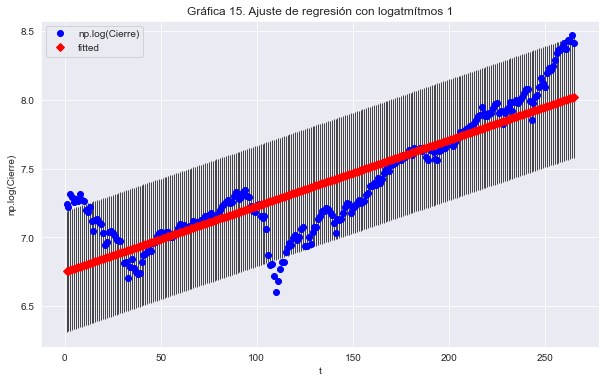

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.plot_fit(mod2, "t", ax=ax)
ax.set_title("Gráfica 15. Ajuste de regresión con logatmítmos 1")
plt.show()

In [ ]:
SyP = pd.read_csv("C:/Users/ismay/OneDrive/Escritorio/Series/Bases/S&P_500_V.dummy.csv")

# Presentar las primeras cinco líneas del DataFrame
SyP.head()

,Fecha,Cierre,t,t^2,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,31/01/2000,1394.46,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,28/02/2000,1366.42,2,4,0,1,0,0,0,0,0,0,0,0,0,0
2,29/03/2000,1508.52,3,9,0,0,1,0,0,0,0,0,0,0,0,0
3,30/04/2000,1468.25,4,16,0,0,0,1,0,0,0,0,0,0,0,0
4,31/05/2000,1420.60,5,25,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
mod21 = smf.ols("np.log(Cierre) ~ t + m2 + m3 + m4+ m5 + m6 + m7 + m8 + m9 + m10 + m11 + m12", data = SyP).fit()
print(mod21.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Cierre)   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     57.93
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.25e-65
Time:                        16:28:35   Log-Likelihood:                 23.657
No. Observations:                 265   AIC:                            -21.31
Df Residuals:                     252   BIC:                             25.22
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7654      0.053    127.227      0.0

Al agregar variables *dummy* por cada mes, tenemos un ajuste muy similar al de la regresión con logaritmos, esta segunda tan solo 0.1% mayor a la realizada con logaritmos. En esta última regresión, el valor en bolsa es explicado no solo por el tiempo, sino también por los meses del año, con excepción del mes 1 (enero). Cada uno de los meses impacta de forma negativa al valor en bolsa, pero en diferentes magnitudes.

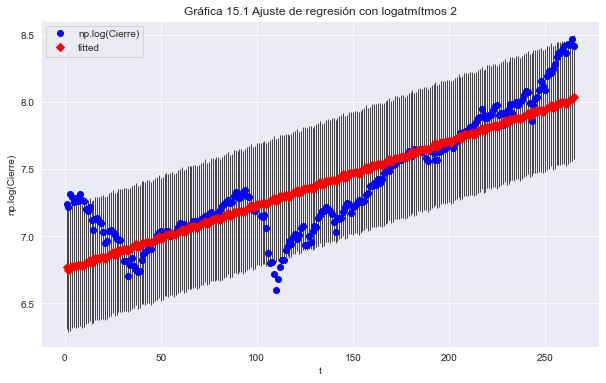

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.plot_fit(mod21, "t", ax=ax)
ax.set_title("Gráfica 15.1 Ajuste de regresión con logatmítmos 2")
plt.show()

Tanto en la **Gráfica 15 y 15.2** tienen un ajuste parecido al de la **Gráfica 11** (mod1) aunque en estas dos últimas gráficas se ajustan un poco más de variables, esta es la forma visual de ver el incremento de la $R^2$

## 9. Realizar análisis residual. Reforzar análisis mediante gráficos Q-Q Norm, Correlogramas e Histogramas.

**Del modelo --> mod1**

In [ ]:
res1 = mod1.resid

$Residuo = V. Real - V. Esperado$

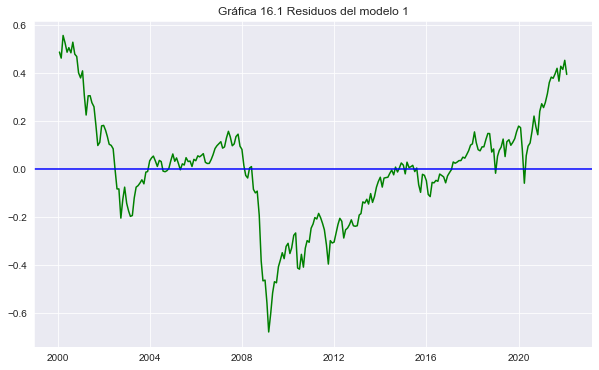

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(res1, color="green")
ax.axhline(0, color='b', linestyle='-')
ax.set_title("Gráfica 16.1 Residuos del modelo 1")
plt.show()

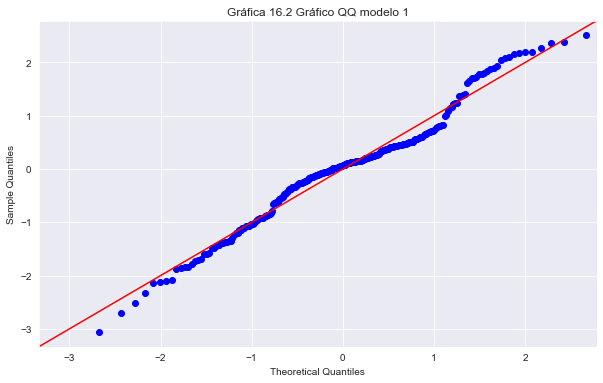

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.qqplot(res1, fit=True, line="45", ax=ax)
ax.set_title("Gráfica 16.2 Gráfico QQ modelo 1")
plt.show()

In [ ]:
from scipy.stats import shapiro
shapiro_test = shapiro(res1)
shapiro_test

ShapiroResult(statistic=0.9762551784515381, pvalue=0.00021047735936008394)

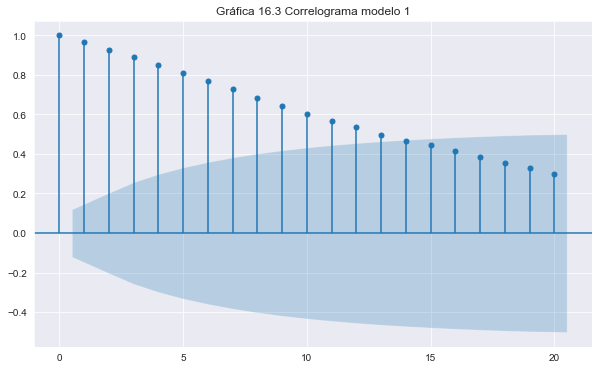

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = plot_acf(res1, lags=20, ax=ax)
ax.set_title("Gráfica 16.3 Correlograma modelo 1")
plt.show()

**Del modelo --> mod2**

In [ ]:
res2 = mod2.resid

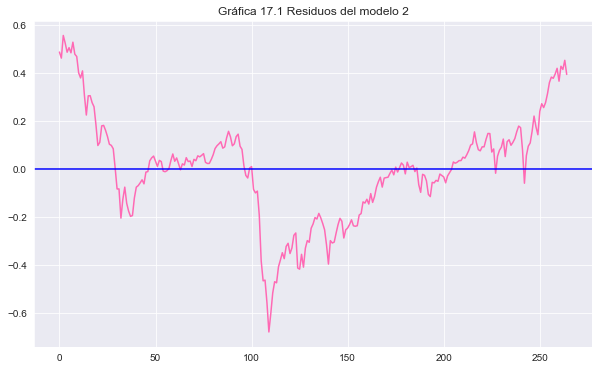

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(res2, color="hotpink")
ax.axhline(0, color='b', linestyle='-')
ax.set_title("Gráfica 17.1 Residuos del modelo 2")
plt.show()

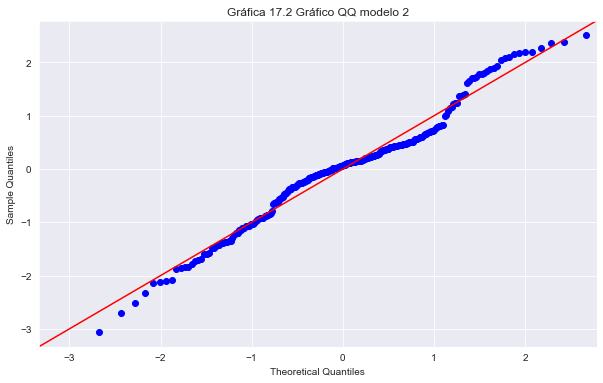

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.qqplot(res2, fit=True, line="45", ax=ax)
ax.set_title("Gráfica 17.2 Gráfico QQ modelo 2")
plt.show()

In [ ]:
from scipy.stats import shapiro
shapiro_test = shapiro(res2)
shapiro_test

ShapiroResult(statistic=0.9762551784515381, pvalue=0.00021047735936008394)

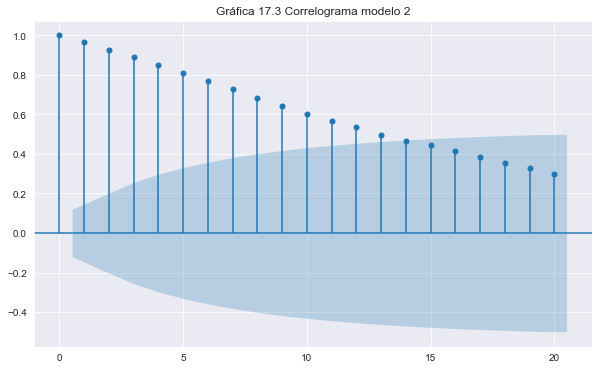

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = plot_acf(res2, lags=20, ax=ax)
ax.set_title("Gráfica 17.3 Correlograma modelo 2")
plt.show()

**Del modelo --> mod21**

In [ ]:
res21 = mod21.resid

$Residuo = V. Real + V. Esperado$

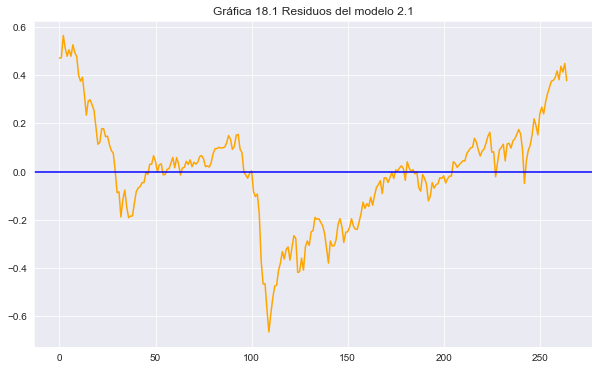

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(res21, color="orange")
ax.axhline(0, color='b', linestyle='-')
ax.set_title("Gráfica 18.1 Residuos del modelo 2.1")
plt.show()

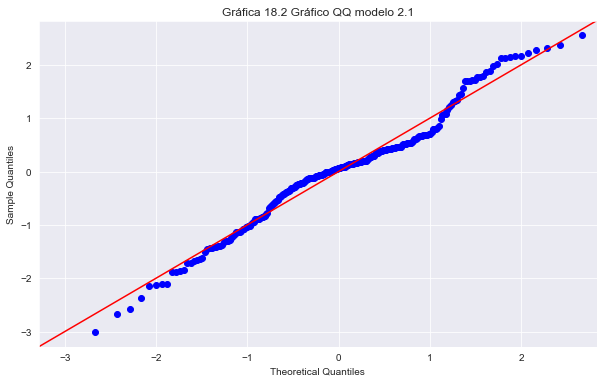

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.qqplot(res21, fit=True, line="45", ax=ax)
ax.set_title("Gráfica 18.2 Gráfico QQ modelo 2.1")
plt.show()

In [ ]:
from scipy.stats import shapiro
shapiro_test = shapiro(res2)
shapiro_test

ShapiroResult(statistic=0.9762551784515381, pvalue=0.00021047735936008394)

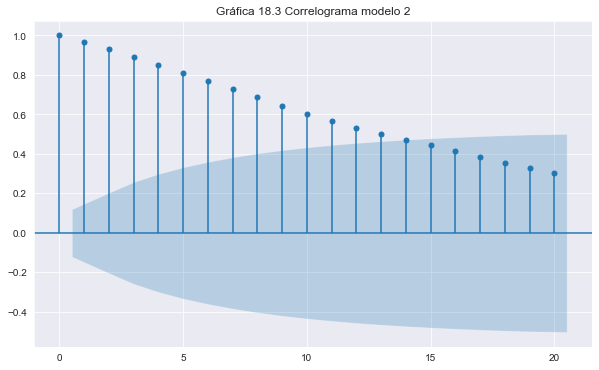

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = plot_acf(res21, lags=20, ax=ax)
ax.set_title("Gráfica 18.3 Correlograma modelo 2")
plt.show()

**Residuos**

Los residuos ayudan a saber si la regresión lineal es la adecuada para la serie en analisis.

En las tres graficas que explican los residuos (**Gráficas 16.1, 17.1 y 18.1**) tienen, (por lo menos de manera visual) la misma cantidad de valores tanto arriba del 0, como abajo. Lo anterior quiere decir que la regresión lineal explica de buena manera la serie, para las tres series.

**Gráfico Q-Q**

Estos gráficos que están numerados como **Gráficas 16.2, 17.2 y 18.2** demuestran la distribución de los datos, si todos estos datos se acomodan dentro de la recta hablamos de que están distribuidos de manera estricta en una distribución normal, pero es muy difícil que esto suceda.

En el caso de nuestras gráficas, encontramos que en las colas los datos se separan más a comparación del resto, pero en medio tienden al centro (con algunas excepciones en algunas zonas, pero estas no se separan mucho) lo cual nos dice que la distribución esta cercana a la normalidad.

**Correlogramas**

Por desgracia, las graficas de los correlogramas **Graficas 16.3, 17.3 y 18.3** demuestra que probablemente existe autocorrelación en los residuos del modelo, ya que los tados de estas gráficas se encuentran fuera de la zona sombreada.